In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib import font_manager

# Font for Chinese
font_path = "/System/Library/Fonts/STHeiti Medium.ttc"  # adjust for your OS
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams["font.family"] = font_prop.get_name()


In [2]:
# Load JSON
with open("balanced_train_test_data.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Access train/test splits
train_data_loaded = data["train"]
test_data_loaded = data["test"]

# Example: print number of utterances for age 2 in train and test
print("Age 2 train utterances:", len(train_data_loaded["2"]))
print("Age 2 test utterances:", len(test_data_loaded["2"]))

# Access actual utterances, e.g. first train utterance for adults
print("First adult train utterance:", train_data_loaded["adult"][0])


Age 2 train utterances: 21497
Age 2 test utterances: 5375
First adult train utterance: 還 這麼 大力 用 我


In [12]:
chars = ["把", "被", "給"]
colors = {"把": "red", "被": "blue", "給": "green"}

plt.figure(figsize=(8, 6))

def plot_pca(age):
    for char in chars:
        data = np.load(f"embeddings_age{age}/{char}_embeddings.npz", allow_pickle=True)
        embs = data["embeddings"]
    
        pca = PCA(n_components=2)
        reduced = pca.fit_transform(embs)
    
        plt.scatter(reduced[:, 0], reduced[:, 1], label=char, alpha=0.6, color=colors[char])
    
    plt.title(f"PCA of contextual embeddings for 把, 被, 給 (age {age} test set)")
    plt.legend(prop=font_prop)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.show()


<Figure size 800x600 with 0 Axes>

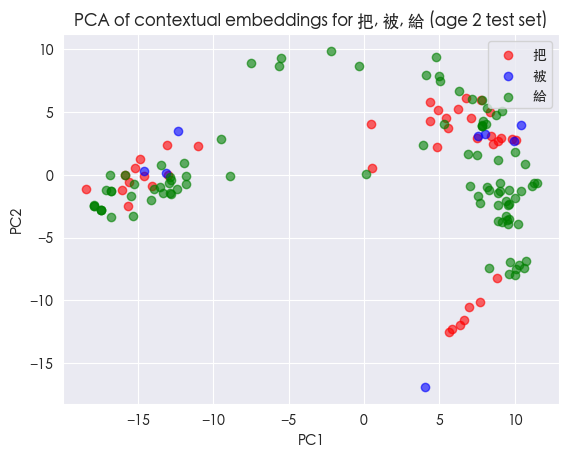

In [13]:
plot_pca(2)

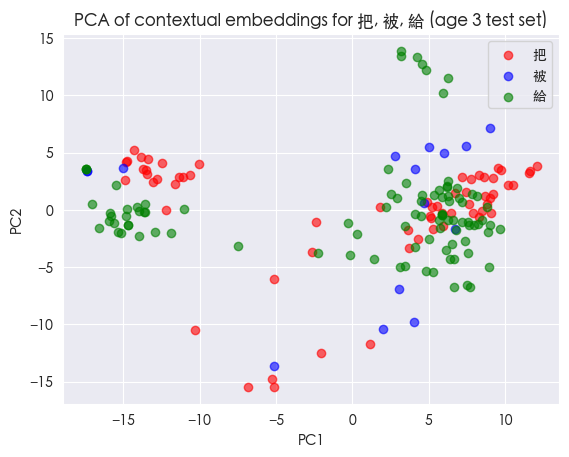

In [14]:
plot_pca(3)

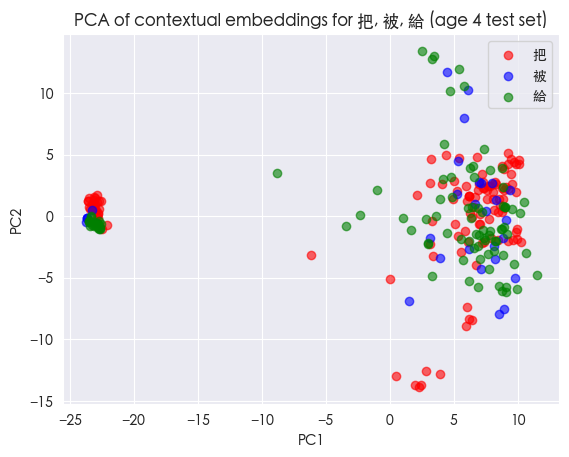

In [15]:
plot_pca(4)

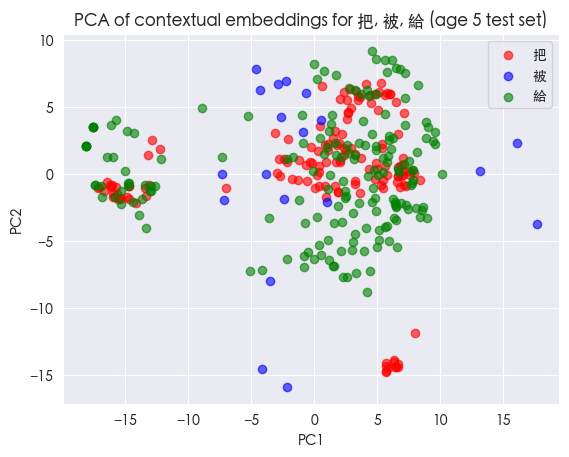

In [16]:
plot_pca(5)

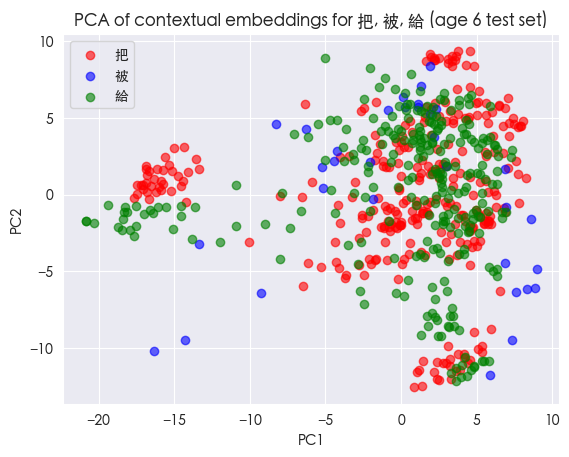

In [17]:
plot_pca(6)

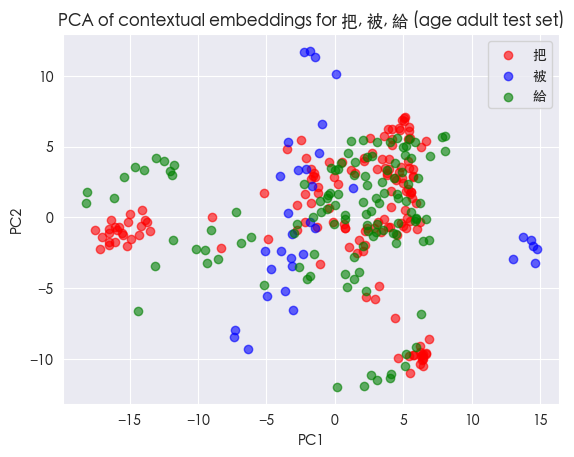

In [18]:
plot_pca('adult')

In [31]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import numpy as np

chars = ["把", "被", "給"]
colors = {"把": "red", "被": "blue", "給": "green"}

def plot_pca_and_cluster_blobs(age, n_clusters=2):
    plt.figure(figsize=(10, 8))
    for char in chars:
        data = np.load(f"embeddings_age{age}/{char}_embeddings.npz", allow_pickle=True)
        embs = data["embeddings"]
        sentences = data["sentences"]

        if len(embs) < n_clusters:
            print(f"Not enough samples for {char} to cluster (has {len(embs)})")
            continue

        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(embs)

        pca = PCA(n_components=2)
        reduced = pca.fit_transform(embs)

        # Plot all points for this char, colored by char
        plt.scatter(reduced[:, 0], reduced[:, 1], color=colors[char], alpha=0.6, label=char)

        # Draw blobs per cluster
        for cluster_id in range(n_clusters):
            cluster_points = reduced[labels == cluster_id]
            if len(cluster_points) < 3:
                continue
            hull = ConvexHull(cluster_points)
            hull_points = cluster_points[hull.vertices]
            plt.fill(hull_points[:, 0], hull_points[:, 1], color=colors[char], alpha=0.15)

            example_idxs = np.where(labels == cluster_id)[0][:3]
            print(f"\n{char} - Cluster {cluster_id} example sentences:")
            for i in example_idxs:
                print(f"  - {sentences[i]}")

    plt.title(f"PCA + cluster blobs for 把, 被, 給 (age {age})")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(prop=font_prop)
    plt.grid(True)
    plt.show()



把 - Cluster 0 example sentences:
  - 為什麼 把 車輪 弄 壞
  - 爬 到 檯子 上面 把 水 打翻 了
  - 壓 出 來 我們 就 可以 把 新 的 放 進 去

把 - Cluster 1 example sentences:
  - 把 這 兩 塊 魚 吃掉 吃 好 了 就 吃 玉米
  - 把 他 先 收 進 盒子 玩 下 一樣 遊戲
  - 把 箱子 這兒 打開 來

被 - Cluster 0 example sentences:
  - 所以 他 要 蓋 著 被子 是不是
  - 這裏 主人 好像 給 貓 弄 了 一 個 被子 睡覺 的 地方
  - 蓋 上 被子 吧

被 - Cluster 1 example sentences:
  - 那 你 有沒有 被 什麼 東西 嚇 到 過
  - 你 有沒有 被 嚇 到 過 啊
  - 你 有沒有 被 什麼 東西 嚇 到 過

給 - Cluster 0 example sentences:
  - 洗 完 澡 給 它 擦 好 對不對
  - 那 我 還 給 你 吃 一 個 的 糖 你 要 不 要
  - 又 給 它 加 了 一 個 什麼 啦

給 - Cluster 1 example sentences:
  - 來 你 車車 給 阿姨 看看
  - 給 他 寫 的 信
  - 那 阿姨 就 打開 給 你


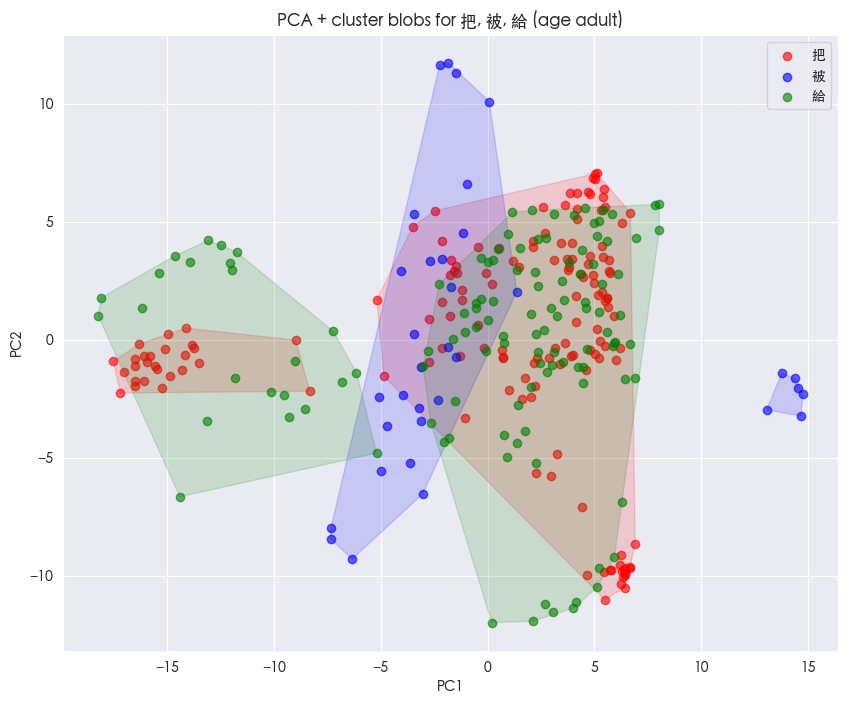

In [34]:
plot_pca_and_cluster_blobs('adult', n_clusters=2)
